# Recap:

        -Root Mean Squared Error
        -Sk.Learn metrics
        - Coef_intercept_error
        - What are the features are impacting the out come/critical features
        - Classification 
            - Binary classification either 0 or 1
            - Bi-variant classification either M or B
            - Multi Variant classifcation 

# Cancer data set

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("cancer.csv")

In [3]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
y=df.diagnosis

In [5]:
x=df.drop(columns=['diagnosis','Unnamed: 32', 'id'])

In [6]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model=LogisticRegression()

In [9]:
model.fit(x,y)

C:\Users\SURESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model.score(x,y)

0.9472759226713533

In [11]:
model.coef_

array([[-0.95422495, -0.46200131, -0.28292272,  0.01673224,  0.03546625,
         0.16714284,  0.23402007,  0.09855826,  0.04913091,  0.00979959,
        -0.04145479, -0.37647827, -0.14565861,  0.11003661,  0.00320805,
         0.03593751,  0.05004455,  0.01283349,  0.01185938,  0.00333598,
        -1.01436645,  0.50822836,  0.25340705,  0.01338833,  0.06435945,
         0.52131331,  0.64876976,  0.18965915,  0.15580535,  0.05008433]])

In [12]:
x.columns


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

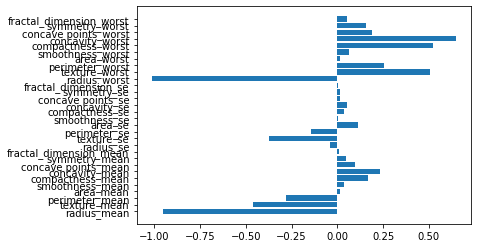

In [15]:
plt.barh(x.columns,model.coef_[0])

In [16]:
coef=[abs(x) for x in model.coef_[0]]

In [18]:
coef

[0.9542249511677218,
 0.46200131109994885,
 0.28292272296152027,
 0.016732241843257355,
 0.03546625344777213,
 0.16714284071913074,
 0.23402007399605,
 0.09855825841703321,
 0.049130907992449006,
 0.009799586457417624,
 0.04145479340754452,
 0.37647827369680226,
 0.14565860668008776,
 0.1100366082890519,
 0.0032080484663911737,
 0.03593750869411023,
 0.050044552712948956,
 0.012833493498323561,
 0.011859379140645096,
 0.003335978957780708,
 1.0143664529527385,
 0.5082283592361737,
 0.25340704988291207,
 0.013388326213484524,
 0.06435944632047824,
 0.5213133058763353,
 0.6487697611484889,
 0.1896591545177664,
 0.15580534649880642,
 0.05008432839897402]

<BarContainer object of 30 artists>

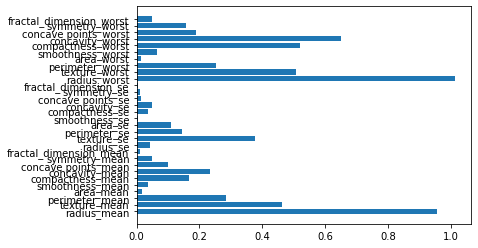

In [19]:
plt.barh(x.columns,coef)

In [20]:
list(zip(x.columns, coef))

[('radius_mean', 0.9542249511677218),
 ('texture_mean', 0.46200131109994885),
 ('perimeter_mean', 0.28292272296152027),
 ('area_mean', 0.016732241843257355),
 ('smoothness_mean', 0.03546625344777213),
 ('compactness_mean', 0.16714284071913074),
 ('concavity_mean', 0.23402007399605),
 ('concave points_mean', 0.09855825841703321),
 ('symmetry_mean', 0.049130907992449006),
 ('fractal_dimension_mean', 0.009799586457417624),
 ('radius_se', 0.04145479340754452),
 ('texture_se', 0.37647827369680226),
 ('perimeter_se', 0.14565860668008776),
 ('area_se', 0.1100366082890519),
 ('smoothness_se', 0.0032080484663911737),
 ('compactness_se', 0.03593750869411023),
 ('concavity_se', 0.050044552712948956),
 ('concave points_se', 0.012833493498323561),
 ('symmetry_se', 0.011859379140645096),
 ('fractal_dimension_se', 0.003335978957780708),
 ('radius_worst', 1.0143664529527385),
 ('texture_worst', 0.5082283592361737),
 ('perimeter_worst', 0.25340704988291207),
 ('area_worst', 0.013388326213484524),
 ('sm

# Iris Flower classfication

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv("iris.csv")

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

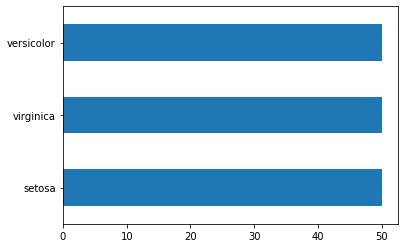

In [25]:
df.species.value_counts().plot(kind='barh')

In [26]:
df.shape

(150, 5)

In [27]:
y=df.species

In [28]:
x=df.drop(columns=['species'])

In [29]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.score(x,y)

0.9733333333333334

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df['predicted']=lr.predict(x)

In [37]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [42]:
df.tail(50)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
100,6.3,3.3,6.0,2.5,virginica,virginica
101,5.8,2.7,5.1,1.9,virginica,virginica
102,7.1,3.0,5.9,2.1,virginica,virginica
103,6.3,2.9,5.6,1.8,virginica,virginica
104,6.5,3.0,5.8,2.2,virginica,virginica
105,7.6,3.0,6.6,2.1,virginica,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor
107,7.3,2.9,6.3,1.8,virginica,virginica
108,6.7,2.5,5.8,1.8,virginica,virginica
109,7.2,3.6,6.1,2.5,virginica,virginica


In [43]:
df.species==df.predicted

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool

In [44]:
df['difference']=(df.species==df.predicted)

In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted,difference
0,5.1,3.5,1.4,0.2,setosa,setosa,True
1,4.9,3.0,1.4,0.2,setosa,setosa,True
2,4.7,3.2,1.3,0.2,setosa,setosa,True
3,4.6,3.1,1.5,0.2,setosa,setosa,True
4,5.0,3.6,1.4,0.2,setosa,setosa,True


In [46]:
df.difference.value_counts()

True     146
False      4
Name: difference, dtype: int64

In [47]:
146/150

0.9733333333333334

In [48]:
lr.score(x,y)

0.9733333333333334

# Clustering:

15,12,12,10,14,7,12,13,7,15,10,10,9,18,9,15,23,3,12,18

4 clusters-- How many clusters what K-value.. how many clusters customer wanted right

[15,12,12,10,14,][7,12,13,7,15][10,10,9,18,9][15,23,3,12,18] - 1st iteration

12.6,10.8,11.2,14.2

[12,12,12,13,12][10,7,][][15,14]
[12,12,12,13,12][10,7,7,10,10,9,9,3][][15,14,15,18,15,23,18] - 2nd iteration

12.1,mean, meanm mean mean

K-Mean algoritham



In [49]:
df=pd.read_csv("iris.csv")

In [50]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
df=df.drop(columns=["species"])

In [53]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
from sklearn.cluster import KMeans

In [55]:
model=KMeans(n_clusters=3)

In [56]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
model.predict([[4.5,5.2,4.3,2.3]])

array([1])

In [60]:
df['machine_predicted_cluster']=model.predict(df)

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,machine_predicted_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
df.machine_predicted_cluster.value_counts()

1    62
0    50
2    38
Name: machine_predicted_cluster, dtype: int64